In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

C:\Users\yadag\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\yadag\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\yadag\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
data = pd.read_csv(r"D:\Data\Deep_Learning\demo_data\7.xor.csv", header=None)

In [3]:
data.head()

,0,1,2
0,1.764052,0.400157,-1.0
1,0.978738,2.240893,-1.0
2,1.867558,-0.977278,1.0
3,0.950088,-0.151357,1.0
4,-0.103219,0.410599,1.0


In [4]:
data.shape
data.info()

(500, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       500 non-null    float64
 1   1       500 non-null    float64
 2   2       500 non-null    float64
dtypes: float64(3)
memory usage: 11.8 KB


In [5]:
data.duplicated().value_counts()

False    500
dtype: int64

In [6]:
data.isna().sum()

0    0
1    0
2    0
dtype: int64

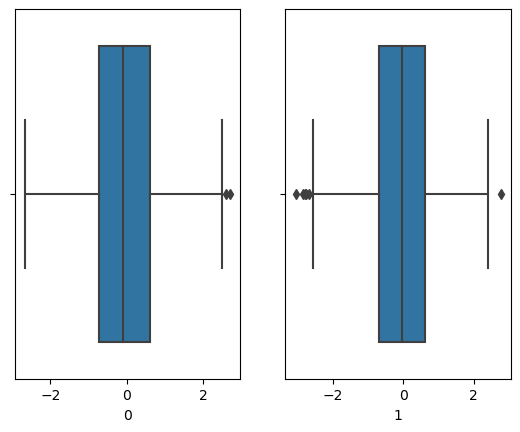

In [7]:
plt.subplot(121)
sns.boxplot(x=data[0])
plt.subplot(122)
sns.boxplot(x=data[1]);

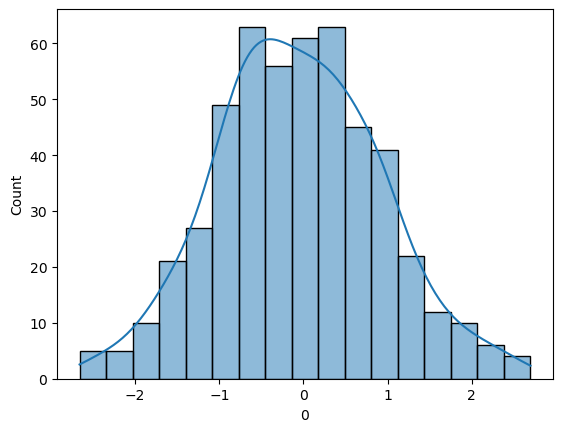

In [8]:
sns.histplot(data[0], kde=True);

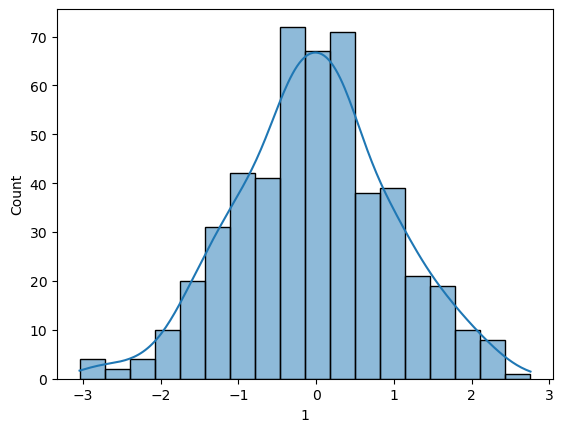

In [9]:
sns.histplot(data[1],kde=True);

In [10]:
data[2].value_counts()

-1.0    260
 1.0    240
Name: 2, dtype: int64

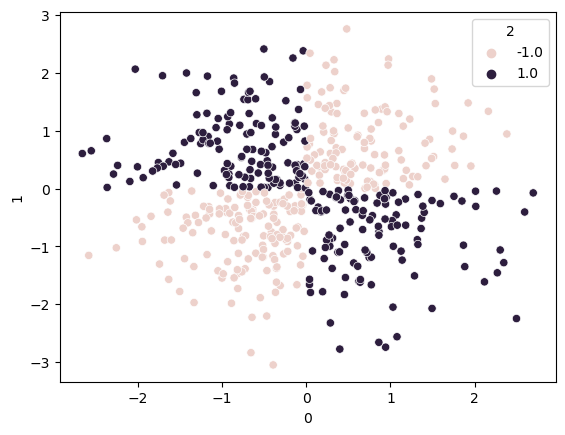

In [11]:
sns.scatterplot(x=data[0], y=data[1], hue=data[2]);

## Splitting the data

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data[[0,1]],data[2],test_size=0.1)

### Rescaling the features

In [13]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_train_trans = std.fit_transform(x_train)
x_test_trans = std.transform(x_test)

In [14]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

## relu and sigmoid

In [43]:
model=Sequential()
model.add(Dense(5,activation="relu",input_dim=2))
model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="tanh"))
model.add(Dense(2,activation="tanh"))
model.add(Dense(1,activation="sigmoid"))

In [44]:
model.get_weights()

[array([[ 0.02016526,  0.17878473,  0.50560105,  0.18828285,  0.79957426],
        [ 0.34475994,  0.43710613, -0.8897747 , -0.5542497 , -0.5788188 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.32568908, -0.8097302 ,  0.6432818 , -0.39323708],
        [ 0.5932288 ,  0.07281184,  0.10515457, -0.26556486],
        [ 0.15785116,  0.4773054 , -0.7719393 ,  0.5029696 ],
        [ 0.35275388,  0.49969578,  0.550609  ,  0.3524977 ],
        [-0.21581942, -0.12223589, -0.2084639 , -0.24846053]],
       dtype=float32),
 array([0., 0., 0., 0.], dtype=float32),
 array([[-0.48740542, -0.23539895,  0.08698362, -0.10979718],
        [-0.1239363 , -0.36632884,  0.04922956,  0.17717546],
        [ 0.8612847 ,  0.3481925 ,  0.33855814,  0.6612616 ],
        [ 0.3938051 ,  0.39679486, -0.07047021, -0.45379516]],
       dtype=float32),
 array([0., 0., 0., 0.], dtype=float32),
 array([[ 0.53509617,  0.6467533 ],
        [ 0.4588852 ,  0.14713717],
        [-0.8260579 ,

In [45]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 5)                 15        
                                                                 
 dense_9 (Dense)             (None, 4)                 24        
                                                                 
 dense_10 (Dense)            (None, 4)                 20        
                                                                 
 dense_11 (Dense)            (None, 2)                 10        
                                                                 
 dense_12 (Dense)            (None, 1)                 3         
                                                                 
Total params: 72
Trainable params: 72
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.compile(optimizer='Rmsprop',loss='binary_crossentropy', metrics=['accuracy'])

In [47]:
history = model.fit(x_train_trans,y_train,epochs=500,validation_split=0.2)

Epoch 1/500
12/12 [==============================] - 1s 18ms/step - loss: 0.6604 - accuracy: 0.0333 - val_loss: 0.6273 - val_accuracy: 0.0000e+00
Epoch 2/500
12/12 [==============================] - 0s 4ms/step - loss: 0.5961 - accuracy: 0.0028 - val_loss: 0.5760 - val_accuracy: 0.0000e+00
Epoch 3/500
12/12 [==============================] - 0s 4ms/step - loss: 0.5419 - accuracy: 0.0000e+00 - val_loss: 0.5309 - val_accuracy: 0.0000e+00
Epoch 4/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4873 - accuracy: 0.0000e+00 - val_loss: 0.4827 - val_accuracy: 0.0000e+00
Epoch 5/500
12/12 [==============================] - 0s 4ms/step - loss: 0.4307 - accuracy: 0.0000e+00 - val_loss: 0.4368 - val_accuracy: 0.0000e+00
Epoch 6/500
12/12 [==============================] - 0s 3ms/step - loss: 0.3765 - accuracy: 0.0000e+00 - val_loss: 0.3967 - val_accuracy: 0.0000e+00
Epoch 7/500
12/12 [==============================] - 0s 4ms/step - loss: 0.3242 - accuracy: 0.0000e+00 - val_loss

In [48]:
y_pred = model.predict(x_test_trans)
y_pred

2/2 [==============================] - 0s 2ms/step


array([[5.3661675e-09],
       [5.3661675e-09],
       [5.3668838e-09],
       [9.9839675e-01],
       [9.9839675e-01],
       [5.5301754e-09],
       [5.4908456e-09],
       [9.9839675e-01],
       [5.3661675e-09],
       [9.9944741e-01],
       [5.3661675e-09],
       [5.3670992e-09],
       [5.3661675e-09],
       [9.9839675e-01],
       [3.7387547e-01],
       [5.3661675e-09],
       [5.3661675e-09],
       [5.3661675e-09],
       [9.9944746e-01],
       [9.9944198e-01],
       [9.9839675e-01],
       [5.3661777e-09],
       [5.3661675e-09],
       [5.3661675e-09],
       [5.3661675e-09],
       [9.9944746e-01],
       [9.9944746e-01],
       [9.9944746e-01],
       [9.9944746e-01],
       [5.3661675e-09],
       [6.8893362e-09],
       [5.3661675e-09],
       [5.3661675e-09],
       [9.9839675e-01],
       [5.3661675e-09],
       [5.3661675e-09],
       [9.9839675e-01],
       [5.3661675e-09],
       [9.9839675e-01],
       [9.9944746e-01],
       [5.3661675e-09],
       [9.983967

In [49]:
y_pred_trans = np.where(y_pred>0.5,1,0)
y_pred_trans

array([[0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0]])

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_trans)

0.42

In [51]:
val_loss = history.history['val_loss']
loss = history.history['loss']

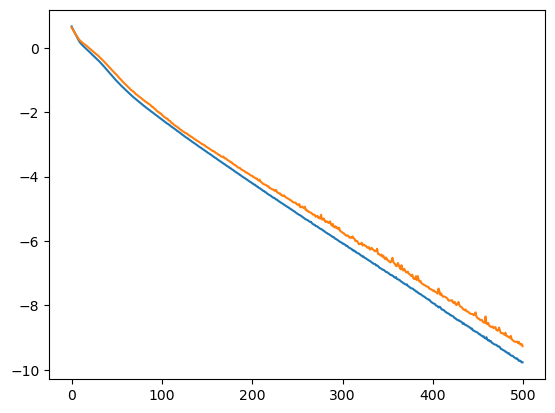

In [52]:
plt.plot(loss)
plt.plot(val_loss)

In [53]:
from mlxtend.plotting import plot_decision_regions

### Decision surface on the original data

9600/9600 [==============================] - 9s 934us/step


<AxesSubplot: >

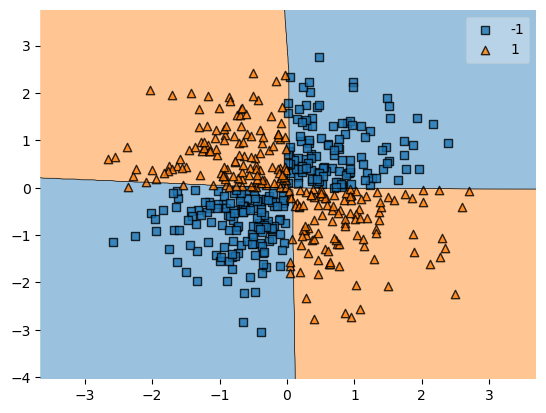

In [54]:
plot_decision_regions(data[[0,1]].values, data[2].values.astype(int), clf=model)

### Decision surface on the train data

9600/9600 [==============================] - 9s 962us/step


<AxesSubplot: >

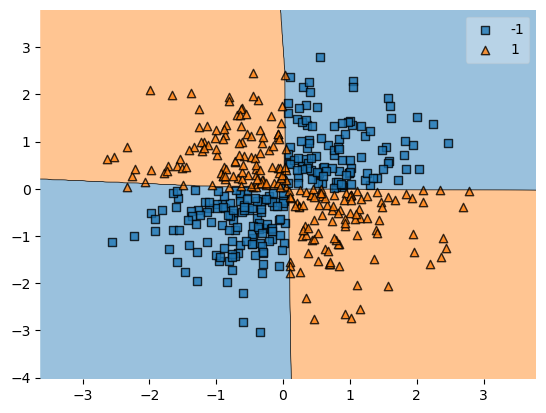

In [55]:
plot_decision_regions(x_train_trans, y_train.values.astype(int), clf=model)

## Desicion Surface on the test data

9600/9600 [==============================] - 9s 954us/step


<AxesSubplot: >

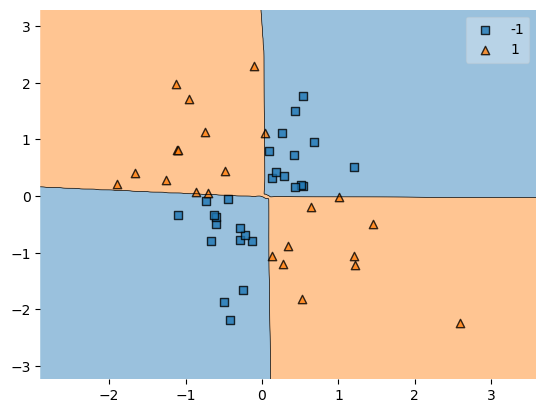

In [56]:
plot_decision_regions(x_test_trans, y_test.values.astype(int), clf=model)